In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv')

### What are the different types of Missing Data?
1. Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


________

2. Missing Data Not At Random(MNAR): Systematic missing ValuesThere is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [5]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [6]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

_____

### Mean / Median / Mode imputation

In [7]:
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
median = df['Age'].median()
median

28.0

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [11]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

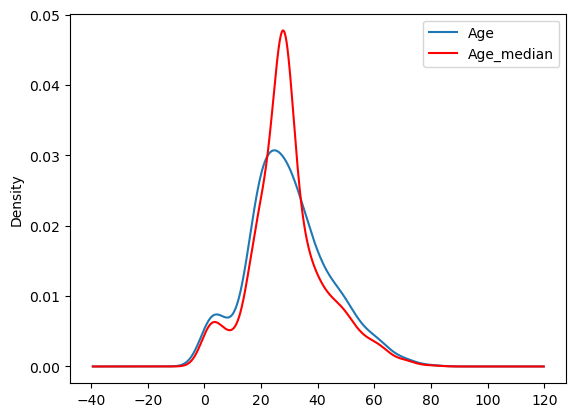

In [13]:
fig = plt.figure();
ax = fig.add_subplot(111);
df['Age'].plot(kind='kde', ax=ax);
df.Age_median.plot(kind='kde', ax=ax, color='red');
lines, labels = ax.get_legend_handles_labels();
ax.legend(lines, labels, loc='best');

_____

### Random Sample Imputation

<b>Aim</b>: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [14]:
import pandas as pd
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
# percentage of missing
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [17]:
df['Age'].dropna().sample(df['Age'].isna().sum(), random_state=13)

769    32.0
195    58.0
875    15.0
787     8.0
289    22.0
       ... 
352    15.0
599    49.0
726    30.0
623    21.0
580    25.0
Name: Age, Length: 177, dtype: float64

In [18]:
df[df['Age'].isna()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [19]:
def impute_nan(df, variable, median):
    df[variable + '_median'] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]

    #it will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(), random_state=13)

    #pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(), variable + '_random'] = random_sample

In [20]:
median = df['Age'].median()

In [21]:
impute_nan(df, 'Age', median)

In [22]:
df.isna().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

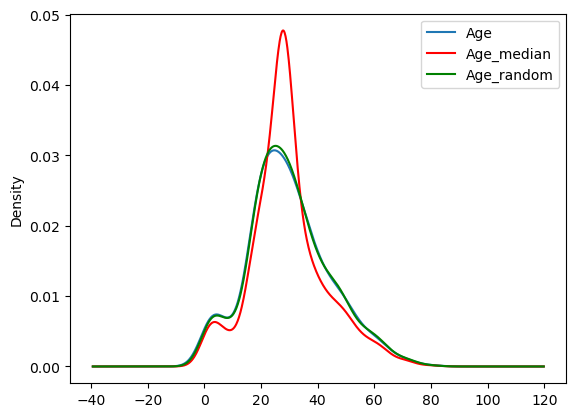

In [23]:
fig = plt.figure();
ax = fig.add_subplot(111);
df['Age'].plot(kind='kde', ax=ax);
df['Age_median'].plot(kind='kde', ax=ax, color='red');
df['Age_random'].plot(kind='kde', ax=ax, color='green');
lines, labels = ax.get_legend_handles_labels();
ax.legend(lines, labels, loc='best');

In [24]:
print('Стандартное отклонение без заполнения', df['Age'].std())
print('Стандартное отклонение median:', df['Age_median'].std())
print('Стандартное отклонение random_sample:', df['Age_random'].std())

Стандартное отклонение без заполнения 14.526497332334044
Стандартное отклонение median: 13.019696550973194
Стандартное отклонение random_sample: 14.471046669753385


__________

### Capturing NAN values with new feature

Works well of the data is not missing at random

In [25]:
import pandas as pd
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df['Age_nan'] = np.where(df['Age'].isna(), 1, 0)

In [27]:
df.head(50)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)

_________

### End of distribution imputation

In [29]:
import pandas as pd
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

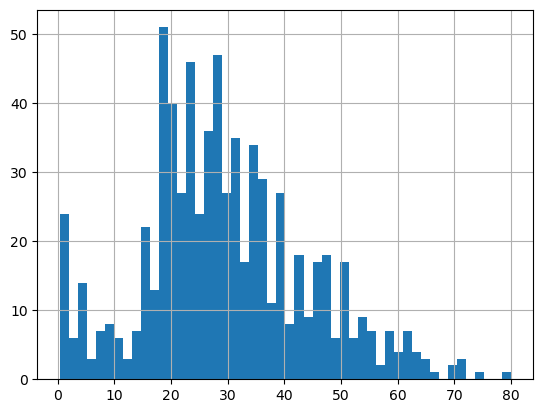

In [30]:
df['Age'].hist(bins=50)

In [31]:
df['Age'].mean()

29.69911764705882

In [32]:
import seaborn as sns

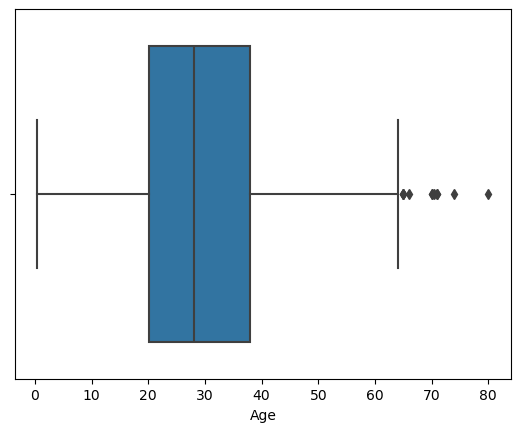

In [33]:
sns.boxplot(data=df, x='Age');

In [34]:
extreme = df['Age'].mean() + 3 * df['Age'].std()

def impute_nan(df, variable, median, extreme):
    df[variable + '_extreme'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [35]:
impute_nan(df, 'Age', df['Age'].median(), extreme)

In [36]:
df.head()

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


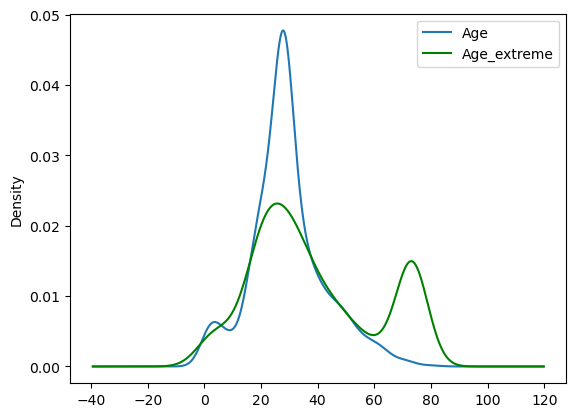

In [37]:
fig = plt.figure();
ax = fig.add_subplot(111);
df['Age'].plot(kind='kde', ax=ax);
df['Age_extreme'].plot(kind='kde', ax=ax, color='green');
lines, labels = ax.get_legend_handles_labels();
ax.legend(lines, labels, loc='best');

________

### Arbitary imputing

In [38]:
import pandas as pd
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [40]:
impute_nan(df, 'Age')

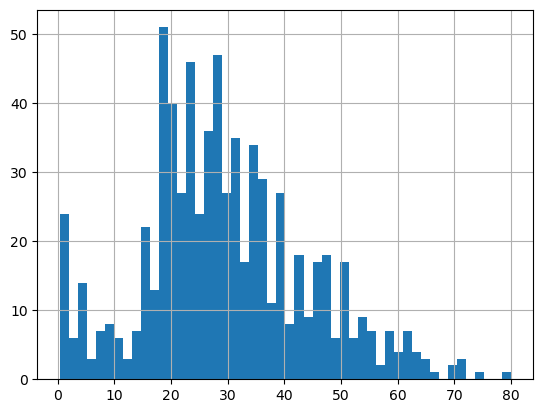

In [42]:
df['Age'].hist(bins=50);